# Data Visualization

In [1]:
# load packages
import os
import sys
PROJECT_DIR = os.path.abspath(os.path.abspath('') )
sys.path.append(PROJECT_DIR)

import numpy as np
import torch as th
import matplotlib.pyplot as plt

from basicts.utils import load_pkl,load_adj
from basicts.data import SCALER_REGISTRY
# 确保 transform 模块被导入以注册所有的缩放器函数
from basicts.data import transform

## 1. Hyper-Parameter

In [2]:
# hyper-parameter
DATASET_NAME = "PEMS04"
# DATASET_NAME = "METR-LA"
INPUT_LEN = 12
OUTPUT_LEN = 12
MODE = "train"
RESCALE = True

assert MODE in ["train", "valid", "test"], "error mode"

In [3]:
# file paths
data_file_path = PROJECT_DIR + "/datasets/{0}/data_in_{1}_out_{2}_rescale_{3}.pkl".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN, RESCALE)
index_file_path = PROJECT_DIR + "/datasets/{0}/index_in_{1}_out_{2}_rescale_{3}.pkl".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN, RESCALE)
scaler_file_path = PROJECT_DIR + "/datasets/{0}/scaler_in_{1}_out_{2}_rescale_{3}.pkl".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN, RESCALE)

In [4]:
# file paths
index_file_path = PROJECT_DIR + "/datasets/{0}/index_in{1}_out{2}.pkl".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)
scaler_file_path = PROJECT_DIR + "/datasets/{0}/scaler_in{1}_out{2}.pkl".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)

data_file_path = PROJECT_DIR + "/datasets/{0}/data_in{1}_out{2}.pkl".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)

In [13]:
# if_exists = os.path.exists(data_file_path) and os.path.exists(index_file_path) and os.path.exists(scaler_file_path)
# err_msg = "Dataset {0} under settings (input_len={1}, output_len={2}) does not exist.".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)
# tip_msg = "Please run the following command to generate the dataset: python scripts/data_preparation/{0}/generate_training_data.py --history_seq_len {1} --future_seq_len {2}".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)

# if not if_exists:
#     print(err_msg)
#     print(tip_msg)
#     sys.exit(1)

# load pre-processed data (normalized)
data = load_pkl(data_file_path)["processed_data"]
# load indexes of samples
index = load_pkl(index_file_path)[MODE]
# # load scaler
scaler = load_pkl(scaler_file_path)

In [5]:
adj_file_path = PROJECT_DIR + "/datasets/{0}/adj_mx.pkl".format(DATASET_NAME)
adj,_ = load_adj(adj_file_path,"original")
print(adj)
import numpy as np
import json
# 创建示例数组
# array = np.random.rand(3, 3)
print(type(adj))
print(adj[0].shape)
# 保存到 .csv 文件
with open('array.json', 'w') as f:
    json.dump(adj[0].tolist(), f)

# with open('array2.json', 'w') as f:
#     json.dump(_.tolist(), f)
coordinates = np.argwhere(adj[0] == 1.0)

# 输出坐标
print("值为 1.0 的坐标：")
for id, coord in enumerate(coordinates):
    if coord[0] == 20:
        print(tuple(coord))




[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(307, 307), dtype=float32)]
<class 'list'>
(307, 307)
值为 1.0 的坐标：
(np.int64(20), np.int64(301))


## 2. Read Data

In [10]:
if_exists = os.path.exists(data_file_path) and os.path.exists(index_file_path) and os.path.exists(scaler_file_path)
err_msg = "Dataset {0} under settings (input_len={1}, output_len={2}) does not exist.".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)
tip_msg = "Please run the following command to generate the dataset: python scripts/data_preparation/{0}/generate_training_data.py --history_seq_len {1} --future_seq_len {2}".format(DATASET_NAME, INPUT_LEN, OUTPUT_LEN)

if not if_exists:
    print(err_msg)
    print(tip_msg)
    sys.exit(1)

# load pre-processed data (normalized)
data = load_pkl(data_file_path)["processed_data"]
# load indexes of samples
index = load_pkl(index_file_path)[MODE]
# load scaler
scaler = load_pkl(scaler_file_path)

In [11]:
# data
print("data shape: {0}".format(data.shape))
# index
print("top ten sliding windows: {0}".format(index[:10]))
print("number of sliding windows (i.e., {0} samples): {1}".format(MODE, len(index)))
# scaler
print("scaler information: {0}".format(scaler))
# re-normalize data for visualization
if RESCALE:
    data[:, :, [0]] = SCALER_REGISTRY.get(scaler["func"])(th.Tensor(data[:, :, [0]]), **scaler["args"]).numpy()

data shape: (16992, 307, 3)
top ten sliding windows: [(0, 12, 24), (1, 13, 25), (2, 14, 26), (3, 15, 27), (4, 16, 28), (5, 17, 29), (6, 18, 30), (7, 19, 31), (8, 20, 32), (9, 21, 33)]
number of sliding windows (i.e., train samples): 10181
scaler information: {'func': 're_standard_transform', 'args': {'mean': np.float64(207.21009963744956), 'std': np.float64(156.48002643540894)}}


## 3. Plot Raw Data

In [12]:
def plot_raw_data(data: np.array, selected_node_id: int,selected_node_id1, begin_time: int = None, end_time: int = None, line_width: float = 1.5, font_size: int = 16, color="green", figure_size: tuple = (10, 5)):
    """plot raw data.

    Args:
        data (np.array): raw data with shape [num_time_slices, num_time_series, num_features].
        selected_node_id (int): selected time series.
        begin_time (int, optional): begin time. Defaults to None.
        end_time (int, optional): end time. Defaults to None.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        color (str, optional): color. Defaults to "green".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    plt.rcParams['figure.figsize'] = figure_size
    
    plot_data = data[begin_time:end_time, selected_node_id, 0]
    plot_data1 = data[begin_time:end_time, selected_node_id1, 0]
    plot_index = np.arange(plot_data.shape[0])
    
    color2 = "red"
    
    plt.plot(plot_index, plot_data, linewidth=line_width, color=color, label="Sensor{} data".format(selected_node_id))
    plt.plot(plot_index, plot_data1, linewidth=line_width, color=color2, label="Sensor{} data".format(selected_node_id1))
    
    plt.grid()
    plt.legend(fontsize=font_size)
    # plt.savefig('vis.eps',dpi=600,format='eps', transparent=True)
    plt.show()
    plt.clf()
    

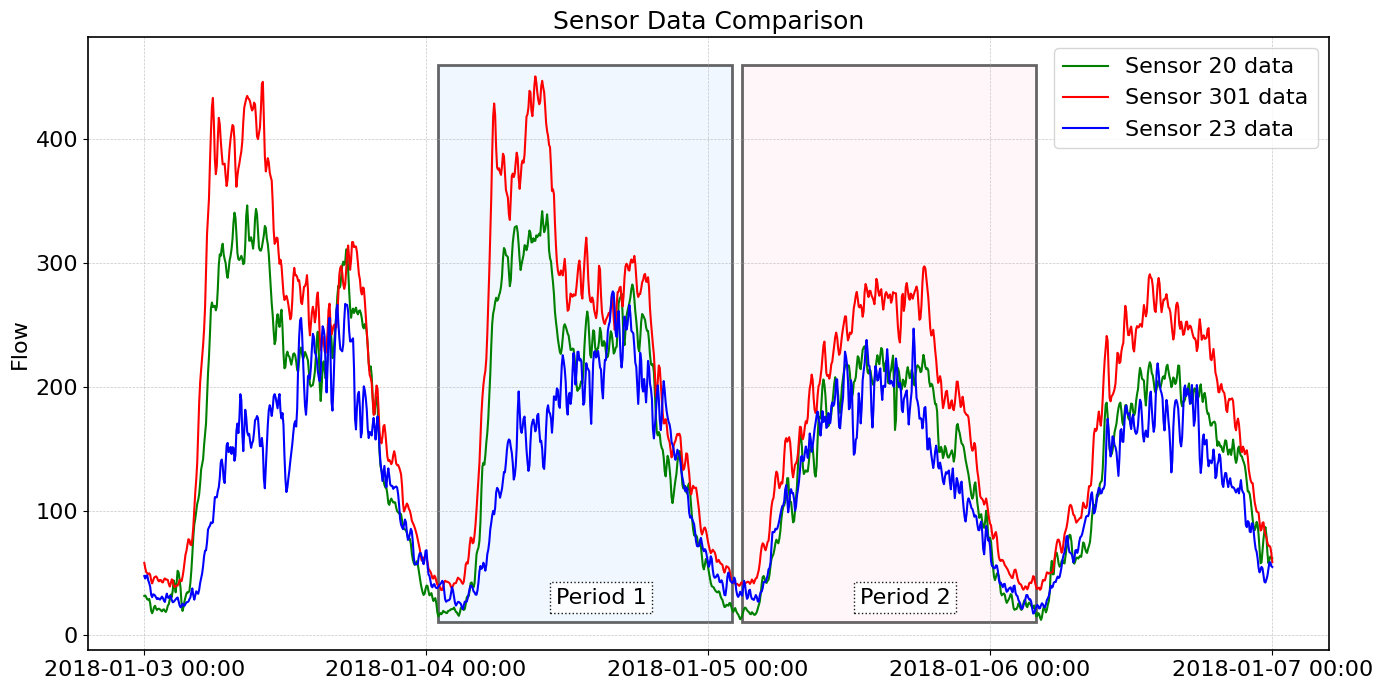

<Figure size 1400x700 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import matplotlib.patches as mpatches

def plot_raw_data(
    data: np.array, 
    selected_node_id1: int,  # First selected node
    selected_node_id2: int,  # Second selected node
    selected_node_id3: int,  # Third selected node
    begin_time: int = 0, 
    end_time: int = None, 
    line_width: float = 2.0, 
    font_size: int = 14, 
    color1="green",  # Color for first node
    color2="red",    # Color for second node
    color3="blue",   # Color for third node
    figure_size: tuple = (12, 6),
    start_date: str = "2018-02-18 00:00",  # Start date and time
    end_date: str = "2018-02-25 00:00"  # End date and time
):
    """Plot raw data with improved visualization."""
    if end_time is None:
        end_time = data.shape[0]
    
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    
    # Set the figure size
    plt.rcParams['figure.figsize'] = figure_size
    plt.rcParams['axes.linewidth'] = 1.2  # Make border thicker
    
    # Extract data for all three selected nodes
    plot_data1 = data[begin_time:end_time, selected_node_id1, 0]
    plot_data2 = data[begin_time:end_time, selected_node_id2, 0]
    plot_data3 = data[begin_time:end_time, selected_node_id3, 0]
    plot_index = np.arange(plot_data1.shape[0])
    
    # Smoothing the data (optional)
    plot_data1 = gaussian_filter1d(plot_data1, sigma=1)
    plot_data2 = gaussian_filter1d(plot_data2, sigma=1)
    plot_data3 = gaussian_filter1d(plot_data3, sigma=1)
    
    # Create figure and get axis
    fig, ax = plt.subplots()
    
    # Set background color to light gray
    # fig.patch.set_facecolor('lightgray')
    
    # 先绘制网格（zorder=0，最底层）
    ax.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7, zorder=0)
    
    # 然后添加矩形（zorder=1，在网格之上）
    # 注意：使用 import matplotlib.patches 以确保正确的 Rectangle 类
    
    # 浅蓝色矩形 - 使用浅色调
    rect1 = mpatches.Rectangle((300, 10), 300, 450, 
                               linewidth=2, 
                               edgecolor='black', 
                               facecolor="#E6F3FF",  # 浅蓝色
                               alpha=0.6, 
                               zorder=1)
    # 浅粉色矩形 - 使用浅色调
    rect2 = mpatches.Rectangle((610, 10), 300, 450, 
                               linewidth=2, 
                               edgecolor='black', 
                               facecolor="#FFF0F5",  # 浅粉色
                               alpha=0.6, 
                               zorder=1)
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    
    # 最后绘制数据线（zorder=3，在矩形之上）
    ax.plot(
        plot_index, plot_data1, linewidth=line_width, color="#FFF0F5", linestyle='-', 
        label=f"Sensor {selected_node_id1} data", antialiased=True, zorder=3
    )
    ax.plot(
        plot_index, plot_data2, linewidth=line_width, color=color2, linestyle='-', 
        label=f"Sensor {selected_node_id2} data", antialiased=True, zorder=3
    )
    ax.plot(
        plot_index, plot_data3, linewidth=line_width, color=color3, linestyle='-', 
        label=f"Sensor {selected_node_id3} data", antialiased=True, zorder=3
    )
    
    # Add text labels (zorder=4 确保文字在最上层)
    ax.text(420, 25, "Period 1", bbox={'facecolor':'white', 'alpha':0.9, 'edgecolor':'black', 'linestyle':'dotted'}, 
            fontsize=font_size, zorder=4)
    ax.text(730, 25, "Period 2", bbox={'facecolor':'white', 'alpha':0.9, 'edgecolor':'black', 'linestyle':'dotted'}, 
            fontsize=font_size, zorder=4)
    
    # Define the tick positions for specific dates
    tick_positions = [
        "2018-01-03 00:00", 
        "2018-01-04 00:00",
        "2018-01-05 00:00",
        "2018-01-06 00:00",
        "2018-01-07 00:00",
    ]
    
    # Calculate the tick positions on the x-axis based on data length
    tick_indices = np.linspace(0, end_time - begin_time - 1, len(tick_positions), dtype=int)
    
    # Manually set the x-ticks as string labels at the corresponding indices
    ax.set_xticks(tick_indices)
    ax.set_xticklabels(tick_positions, rotation=0, fontsize=font_size)
    
    y = range(0, 500, 100)
    ax.set_yticks(y)
    ax.tick_params(axis='y', labelsize=font_size)

    # 图例和标签
    ax.legend(fontsize=font_size)
    # ax.set_xlabel("Time", fontsize=font_size)
    ax.set_ylabel("Flow", fontsize=font_size)
    ax.set_title("Sensor Data Comparison", fontsize=font_size + 2)
    
    # Call tight_layout AFTER all elements are added
    plt.tight_layout()
    
    # Save and show
    plt.savefig('figure/raw_data.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()

# 调用函数绘图
plot_raw_data(data=data, selected_node_id1=20, selected_node_id2=301, selected_node_id3=23, 
              begin_time=864, end_time=2016, line_width=1.5, font_size=16, figure_size=(14, 7))

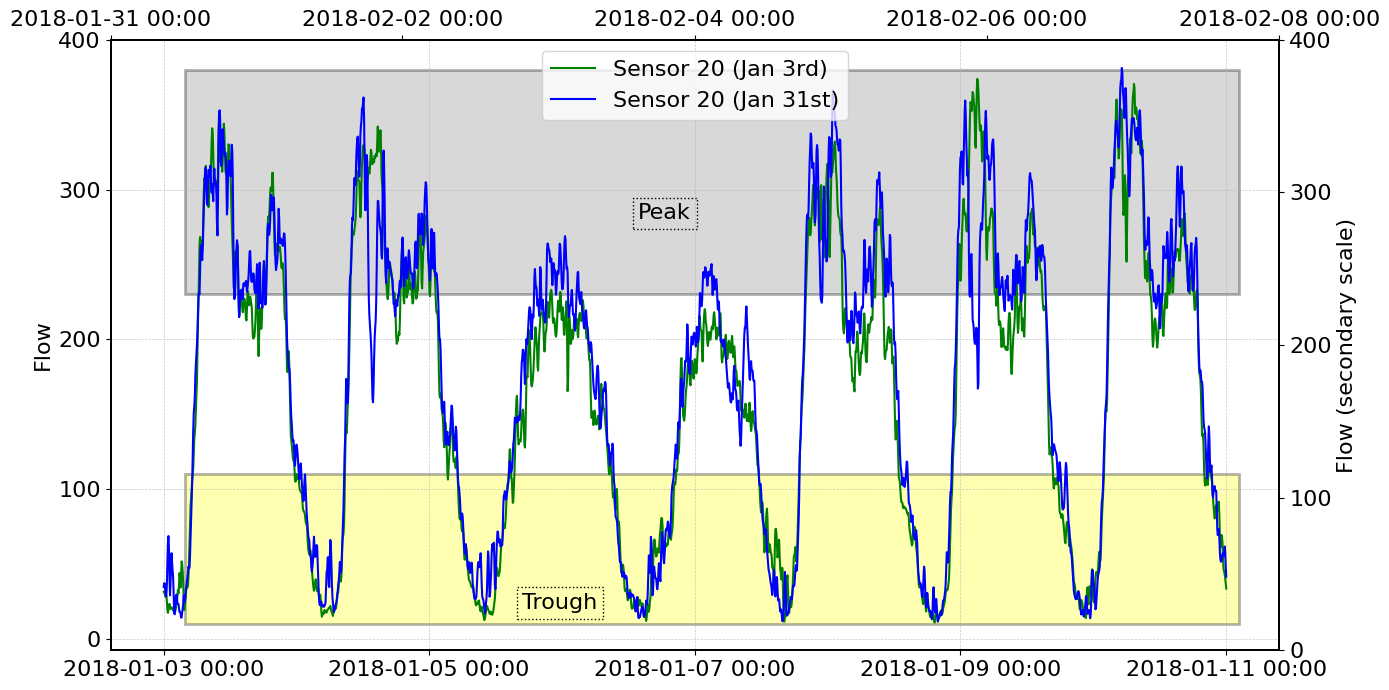

<Figure size 1400x700 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def plot_raw_data(
    data: np.array, 
    selected_node_id1: int,  # First selected node
    selected_node_id2: int,  # Second selected node
    # selected_node_id3: int,  # Third selected node
    begin_time: int = 0, 
    end_time: int = None, 
    begin_time1: int = None,
    end_time1: int = None,
    line_width: float = 2.0, 
    font_size: int = 14, 
    color1="green",  # Color for first node
    color2="blue",    # Color for second node
    # color3="blue",   # Color for third node
    figure_size: tuple = (12, 6),
    start_date: str = "2018-02-18 00:00",  # Start date and time
    end_date: str = "2018-02-25 00:00"  # End date and time
):
    """Plot raw data with dual x-axes and dual y-axes."""
    if end_time is None:
        end_time = data.shape[0]
    
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    
    # Set the figure size
    plt.rcParams['figure.figsize'] = figure_size
    plt.rcParams['axes.linewidth'] = 1.2  # Make border thicker
    
    # Extract data for all three selected nodes
    plot_data1 = data[begin_time:end_time, selected_node_id1, 0]
    plot_data2 = data[begin_time1:end_time1, selected_node_id2, 0]
    # plot_data3 = data[begin_time:end_time, selected_node_id3, 0]
    plot_index = np.arange(plot_data1.shape[0])
    
    # Smoothing the data (optional)
    plot_data1 = gaussian_filter1d(plot_data1, sigma=1)
    plot_data2 = gaussian_filter1d(plot_data2, sigma=1)
    # plot_data3 = gaussian_filter1d(plot_data3, sigma=1)
    
    # Create figure and axes
    fig, ax1 = plt.subplots()

    # Plot the data for each selected node on the first y-axis
    ax1.plot(
        plot_index, plot_data1, linewidth=line_width, color=color1, linestyle='-', 
        label=f"Sensor {selected_node_id1} (Jan 3rd)", antialiased=True
    )
    ax1.plot(
        plot_index, plot_data2, linewidth=line_width, color=color2, linestyle='-', 
        label=f"Sensor {selected_node_id2} (Jan 31st)", antialiased=True
    )
    # ax1.plot(
    #     plot_index, plot_data3, linewidth=line_width, color=color3, linestyle='-.', 
    #     label=f"Sensor {selected_node_id3} data", antialiased=True
    # )
    
    # Define the tick positions for specific dates for top and bottom x-axes
    tick_positions_bottom = [
        "2018-01-03 00:00", 
        "2018-01-05 00:00",
        "2018-01-07 00:00",
        "2018-01-09 00:00",
        "2018-01-11 00:00"
    ]
    tick_positions_top = [
        "2018-01-31 00:00", 
        "2018-02-02 00:00",
        "2018-02-04 00:00",
        "2018-02-06 00:00",
        "2018-02-08 00:00"
    ]
    
    # Calculate the tick positions on the x-axis based on data length
    tick_indices_top = np.linspace(0, end_time1 - begin_time1 - 1, len(tick_positions_top), dtype=int)
    tick_indices_bottom = np.linspace(0, end_time - begin_time - 1, len(tick_positions_bottom), dtype=int)
    
    # Set the top x-axis and bottom x-axis
    ax2 = ax1.twiny()  # Second x-axis on the top
    ax2.set_xticks(tick_indices_top)
    ax2.set_xticklabels(tick_positions_top, rotation=0, fontsize=font_size)
    
    ax1.set_xticks(tick_indices_bottom)
    ax1.set_xticklabels(tick_positions_bottom, rotation=0, fontsize=font_size)

    # Set dual y-axes
    ax1.set_ylabel("Flow", fontsize=font_size)
    ax1.set_yticks(range(0, 500, 100))
    ax1.tick_params(axis='y', labelsize=font_size)

    ax3 = ax1.twinx()  # Second y-axis on the right
    ax3.set_ylabel("Flow (secondary scale)", fontsize=font_size)
    ax3.set_yticks(range(0, 500, 100))
    ax3.tick_params(axis='y', labelsize=font_size)

    # Add rectangular patches for highlighting periods
    ax1.add_patch(plt.Rectangle((40, 230), 2000, 150, linewidth=2, edgecolor='black', facecolor="gray", alpha=0.3))
    ax1.text(900, 280, "Peak", bbox={'facecolor':'none', 'alpha':1,'linestyle':'dotted'}, fontsize=font_size)
    
    ax1.add_patch(plt.Rectangle((40, 10), 2000, 100, linewidth=2, edgecolor='black', facecolor="yellow", alpha=0.3))
    ax1.text(680, 20, "Trough", bbox={'facecolor':'none', 'alpha':1, 'linestyle':'dotted'}, fontsize=font_size)
    
    # Grid, legend, and title
    ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax1.legend(fontsize=font_size)
    # ax1.set_title("Sensor Data Comparison", fontsize=font_size + 2)
    plt.tight_layout()

    # Save the figure
    # plt.savefig('figure/raw_data2.tif')
    plt.savefig('figure/raw_data2.pdf')

    # Show and clear
    plt.show()
    plt.clf()
plot_raw_data(data=data, selected_node_id1=20, selected_node_id2=20, begin_time=864, end_time=2880,begin_time1=8928, end_time1=10944, line_width=1.5, font_size=16, figure_size=(14, 7))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# =============== 示例：把你现有的数据喂进来 =================
# y_true: (T, N), y_pred: (T, N), 可选 y_base: (T, N)
# times: 长度 T（可为 DatetimeIndex）
# 举例：假设你已有 y_true, y_pred, times
# y_base = ...  # 可选
# node_ids = [20, 23, 301]  # 你想看的传感器
# mask_spatial = {20, 23}   # 可选：被空间掩码过的节点
# mask_temporal = [(100, 140)]  # 可选：时间掩码区间（半开半闭自己决定）

# 如果 times 不是 pandas 时间，自动构造一个简单索引
def _ensure_times(times, T):
    if times is None:
        return pd.RangeIndex(T)
    if isinstance(times, (list, np.ndarray)):
        return pd.Index(times)
    return times

# 计算误差
def mae(a, b, axis=0):
    return np.mean(np.abs(a - b), axis=axis)

def rmse(a, b, axis=0):
    return np.sqrt(np.mean((a - b)**2, axis=axis))

# 画单节点 case（含事件阴影/掩码区间）
def plot_case_single_node(y_true, y_pred, times, node_idx, y_base=None,
                          mask_temporal=None, title=None, savepath=None):
    T = y_true.shape[0]
    times = _ensure_times(times, T)
    gt = y_true[:, node_idx]
    pr = y_pred[:, node_idx]
    if y_base is not None:
        bs = y_base[:, node_idx]

    fig, ax = plt.subplots(figsize=(10, 4.2))
    ax.plot(times, gt, lw=2.2, label='Ground Truth')
    ax.plot(times, pr, lw=2.0, label='Ours', alpha=0.95)
    if y_base is not None:
        ax.plot(times, bs, lw=1.8, label='Baseline', alpha=0.9)

    # 标注时间掩码窗口
    if mask_temporal:
        for (t0, t1) in mask_temporal:
            # t0,t1 可为索引或时间本身，下面做索引级处理
            if isinstance(times, pd.DatetimeIndex):
                x0, x1 = times[t0], times[t1]
            else:
                x0, x1 = times[t0], times[t1]
            ax.axvspan(x0, x1, color='grey', alpha=0.15, label='Temporal Mask' if t0==mask_temporal[0][0] else None)

    ax.set_xlabel('Time')
    ax.set_ylabel('Traffic')
    if title is None:
        title = f'Case Study — Sensor {node_idx}'
    ax.set_title(title)
    ax.grid(True, ls='--', alpha=0.3)
    ax.legend(loc='upper left', ncol=3, frameon=True)

    # 上方留白
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax + 0.05*(ymax - ymin))

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300)
    plt.show()

# 多节点并排
def plot_case_multi_nodes(y_true, y_pred, times, node_ids, y_base=None,
                          mask_temporal=None, mask_spatial=None,
                          suptitle='Case Study: Multiple Sensors', savepath=None):
    T = y_true.shape[0]
    times = _ensure_times(times, T)
    C = len(node_ids)
    fig, axes = plt.subplots(C, 1, figsize=(10, 3.6*C), sharex=True)
    if C == 1:
        axes = [axes]

    for ax, nid in zip(axes, node_ids):
        gt = y_true[:, nid]
        pr = y_pred[:, nid]
        ax.plot(times, gt, lw=2.2, label='Ground Truth')
        ax.plot(times, pr, lw=2.0, label='Ours', alpha=0.95)
        if y_base is not None:
            ax.plot(times, y_base[:, nid], lw=1.8, label='Baseline', alpha=0.9)

        # 时间掩码阴影
        if mask_temporal:
            for (t0, t1) in mask_temporal:
                x0, x1 = times[t0], times[t1]
                ax.axvspan(x0, x1, color='grey', alpha=0.15)

        # 空间掩码高亮节点标题
        tag = ' (masked)' if (mask_spatial and nid in mask_spatial) else ''
        ax.set_title(f'Sensor {nid}{tag}')
        ax.grid(True, ls='--', alpha=0.3)

        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax + 0.07*(ymax - ymin))  # 留白

    axes[0].legend(loc='upper right', ncol=3, frameon=True)
    axes[-1].set_xlabel('Time')
    fig.suptitle(suptitle, y=0.98, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    if savepath:
        plt.savefig(savepath, dpi=300)
    plt.show()

# 误差热力图（节点×时间），支持对比 ours-baseline 的误差差值
def plot_error_heatmap(y_true, y_pred, times, node_order=None, y_base=None,
                       mode='ours', vmax=None, savepath=None, title=None):
    """
    mode: 'ours' -> |y - y_pred|
          'delta' -> (|y - y_base| - |y - y_pred|)，正值表示 ours 更好
    """
    T, N = y_true.shape
    times = _ensure_times(times, T)
    if node_order is None:
        node_order = np.arange(N)

    err_ours = np.abs(y_true - y_pred)
    if y_base is not None:
        err_base = np.abs(y_true - y_base)

    if mode == 'delta' and y_base is not None:
        mat = (err_base - err_ours)[:, node_order]  # 正值：ours 优于 base
        cmap = 'RdBu_r'
        center = 0.0
    else:
        mat = err_ours[:, node_order]
        cmap = 'viridis'
        center = None

    fig, ax = plt.subplots(figsize=(10, 3.8))
    im = ax.imshow(mat.T, aspect='auto', cmap=cmap, vmax=vmax, vmin=(-vmax if center==0 else None))

    # x 轴显示稀疏刻度
    tick_idx = np.linspace(0, T-1, 6, dtype=int)
    ax.set_xticks(tick_idx)
    ax.set_xticklabels([str(times[i]) for i in tick_idx], rotation=0)
    ax.set_yticks([0, len(node_order)-1])
    ax.set_yticklabels([str(node_order[0]), str(node_order[-1])])

    if title is None:
        title = 'Error Heatmap' if mode == 'ours' else 'Improvement (Baseline - Ours)'
    ax.set_title(title)
    ax.set_xlabel('Time')
    ax.set_ylabel('Node')
    fig.colorbar(im, ax=ax, shrink=0.85, pad=0.01)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300)
    plt.show()

# =============== 你可以这样调用 =================
# 单节点（含遮罩）
# plot_case_single_node(y_true, y_pred, times, node_idx=20, y_base=y_base,
#                       mask_temporal=[(200, 260)], title='Sensor 20', savepath='case_sensor20.pdf')

# 多节点对比
# plot_case_multi_nodes(y_true, y_pred, times, node_ids=[20,23,301], y_base=y_base,
#                       mask_temporal=[(200,260)], mask_spatial={20,23}, 
#                       suptitle='Case Study: Sensors 20/23/301', savepath='case_multi.pdf')

# 误差热力图（ours）
# plot_error_heatmap(y_true, y_pred, times, node_order=None, mode='ours', vmax=None, savepath='heat_ours.pdf')

# 误差提升热力图（ours vs baseline）
# plot_error_heatmap(y_true, y_pred, times, y_base=y_base, mode='delta', vmax=5.0, savepath='heat_improve.pdf')


In [9]:
def plot_raw_data_multi_variable(data: np.array, node_ids: int, begin_time: int = None, end_time: int = None, line_width: float = 1.5, font_size: int = 16, figure_size: tuple = (10, 5)):
    """plot raw data.

    Args:
        data (np.array): raw data with shape [num_time_slices, num_time_series, num_features].
        selected_node_id (int): selected time series.
        begin_time (int, optional): begin time. Defaults to None.
        end_time (int, optional): end time. Defaults to None.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        color (str, optional): color. Defaults to "green".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    plt.rcParams['figure.figsize'] = figure_size
    for selected_node_id in node_ids:
        plot_data = data[begin_time:end_time, selected_node_id, 0]
        plot_index = np.arange(plot_data.shape[0])
        plt.plot(plot_index, plot_data, linewidth=line_width, label="ID: {0}".format(selected_node_id))
    plt.grid()
    plt.legend(fontsize=font_size)
    plt.show()
    plt.clf()

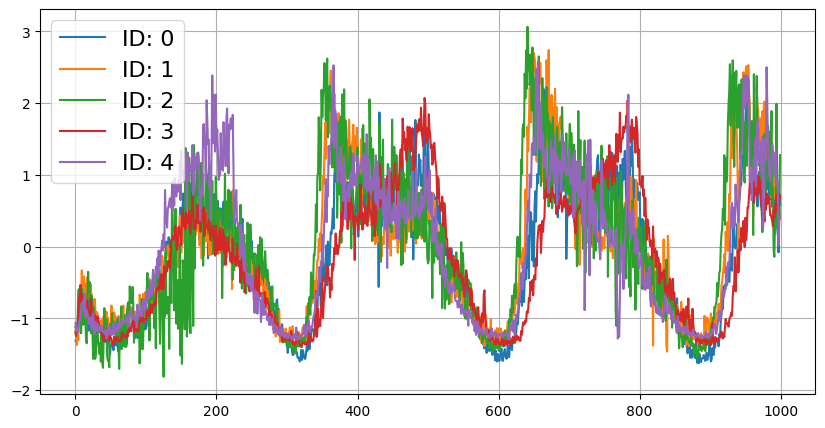

<Figure size 1000x500 with 0 Axes>

In [10]:
plot_raw_data_multi_variable(data=data, node_ids=[0, 1, 2, 3, 4], begin_time=0, end_time=1000, line_width=1.5, font_size=16, figure_size=(10, 5))

## 4. Plot Samples

In [12]:
def plot_sample(data: np.array, index: list, selected_node_id: int, selected_sample_id: int, line_width: float = 1.5, font_size: int = 16, history_color="blue", future_color="red", figure_size: tuple = (10, 5)):
    """plot a sample.
    
    Args:
        data (np.array): raw data with shape [num_time_slices, num_time_series, num_features].
        index (list): indexes of samples.
        selected_node_id (int): selected time series.
        selected_sample_id (int): selected sample.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        history_color (str, optional): color of history data. Defaults to "blue".
        future_color (str, optional): color of future data. Defaults to "red".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    num_samples = len(index)
    assert selected_sample_id < num_samples, "selected_sample_id should be less than {0}".format(num_samples)
    plt.rcParams['figure.figsize'] = figure_size
    sample_index = index[selected_sample_id]
    plot_history_data = data[sample_index[0]:sample_index[1], selected_node_id, 0]
    plot_future_data = data[sample_index[1]:sample_index[2], selected_node_id, 0]
    plot_history_index = np.arange(sample_index[0], sample_index[1])
    plot_future_index = np.arange(sample_index[1], sample_index[2])
    plt.plot(plot_history_index, plot_history_data, linewidth=line_width, color=history_color, label="history data")
    plt.plot(plot_future_index, plot_future_data, linewidth=line_width, color=future_color, label="future data")
    # lint two parts
    plt.plot([plot_history_index[-1], plot_future_index[0]], [plot_history_data[-1], plot_future_data[0]], linewidth=line_width, color=future_color)
    plt.grid()
    plt.legend(fontsize=font_size)
    plt.show()
    plt.clf()

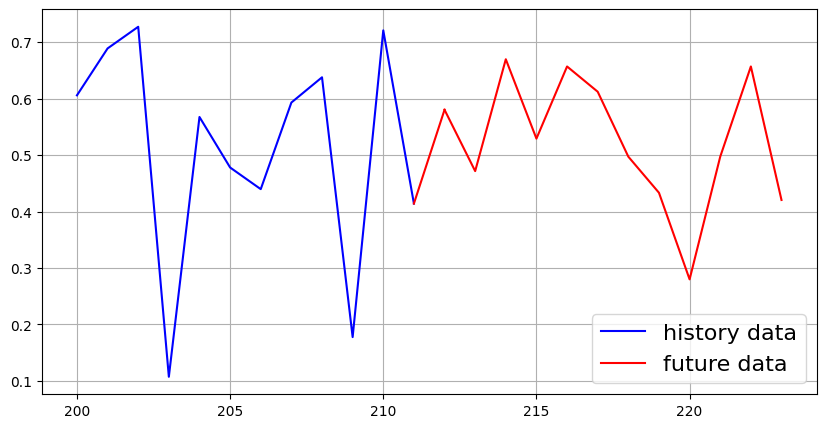

<Figure size 1000x500 with 0 Axes>

In [12]:
plot_sample(data=data, index=index, selected_node_id=0, selected_sample_id=200, line_width=1.5, font_size=16, history_color="blue", future_color="red", figure_size=(10, 5))